# Rain Prediction with Deep Learning Techniques

1. Data manipulation with pandas
2. Feed forward neural networks with keras

This tutorial is meant to be gone through after reading this blog post in a series of deep learning tutorials: https://www.notion.so/Deep-Dive-into-Deep-Learning-2b64f8a2e5774e78a4030262775860af

## Preparing Data

### Import Modules

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

### Read Data

In [2]:
weather_data = pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv')

In [3]:
weather_data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### Check for Missing Data

In [5]:
weather_data.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Drop date column since it has too many unique values and only include rows with a label. Convert the final column into a binary label.

In [6]:
weather_data = weather_data.drop(columns = 'Date')
weather_data = weather_data[~weather_data['RainTomorrow'].isna()]

y = (weather_data['RainTomorrow'] == 'Yes').astype(int) ### Convert last column into label
weather_data = weather_data.drop(columns = 'RainTomorrow')

Get List of Numerical and Categorical Columns

In [7]:
column_dtypes = weather_data.dtypes
categorical_columns = column_dtypes[column_dtypes == 'object'].index.to_list()
numerical_columns = column_dtypes[column_dtypes != 'object'].index.to_list()

### Impute Data

Some of our rows have missing data, instead of dropping those cases which will decrease the size of our dataset significantly we can substiture reasonable values.

For categorical columns a reasonable value would be the mode.
For numerical columns a reasonable value would be the median.

In [8]:
def mode_impute(df):
    mode = df.mode().iloc[0]
    df = df.fillna(mode)
    
    return df
    
mode_impute(weather_data[categorical_columns]).isna().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [9]:
def median_impute(df):
    median = df.median()
    df = df.fillna(median)
    
    return df

median_impute(weather_data[numerical_columns]).isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

### Check For Class Imbalance 

<Axes: xlabel='RainTomorrow'>

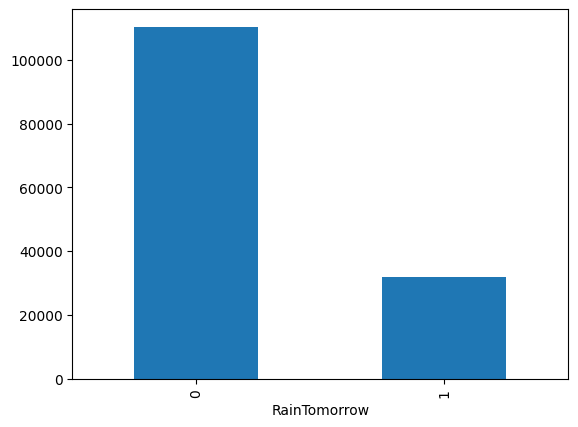

In [10]:
y.value_counts().plot.bar()

### One Hot Encode Categorical Columns

Categorical data can't be used in deep learning directly since models only accept numbers. For the case of data that can be boiled down to True or False we can replace True values with 1 and False values with 0. For the case of categorical data with more than 2 values it can take on for example a columns that can take on the values of red blue and green we can seperate each columns into red present, blue present, and green present, turning into 3 different binary cases and converting it into its numerical representation.

<img src="https://www.statology.org/wp-content/uploads/2021/09/oneHot1.png" alt="How to Perform One-Hot Encoding in Python - Statology"/>

In [11]:
def one_hot_encode(df):
    return pd.get_dummies(df[categorical_columns]).astype(int)

### Normalize Data

In [12]:
def normalize_data(df):
    return (df - df.mean())/df.std()

### Construct Dataset

In [13]:
def create_dataset(df):
    categorical_data = df[categorical_columns]
    numerical_data = df[numerical_columns]
    
    categorical_data = mode_impute(categorical_data)
    numerical_data = median_impute(numerical_data)
    
    categorical_data = one_hot_encode(categorical_data)
    numerical_data = normalize_data(numerical_data)
    
    full_df = pd.concat([categorical_data, numerical_data], axis = 1)
    
    return full_df

In [14]:
X = create_dataset(weather_data)

### Split into Training and Validation

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1)

In [16]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((127973, 115), (14220, 115), (127973,), (14220,))

### Create Model

Here we use a few regularization techniques: dropout, weight decay (with adamW), and label smoothing. We also use the GeLU activation function.

In [17]:
def create_model():
    
    model = keras.Sequential([
        keras.layers.Input(shape = (X.shape[1])),
        keras.layers.Dense(256, activation = 'gelu'),
        keras.layers.Dropout(0.25),
        keras.layers.Dense(128, activation = 'gelu'),
        keras.layers.Dropout(0.5),
        #keras.layers.Dense(64, activation = 'gelu'),
        #keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation = 'sigmoid')
    ])
    
    optimizer = keras.optimizers.AdamW(learning_rate = 3e-3, weight_decay = 1e-1)
    loss = keras.losses.BinaryCrossentropy(label_smoothing = 1e-1)
    
    model.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy', keras.metrics.AUC(curve = 'pr')])
    
    return model

In [18]:
create_model().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               29696     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 62721 (245.00 KB)
Trainable params: 62721 (245.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Train Model

We use a cosine annealing with linear warmup learning rate schedule.

In [19]:
EPOCHS = 20

model = create_model()
lr_schedule = keras.callbacks.LearningRateScheduler(
    keras.optimizers.schedules.CosineDecay(initial_learning_rate = 5e-5, decay_steps = EPOCHS - EPOCHS//10, warmup_target = 3e-3, warmup_steps = EPOCHS//10)
)

history = model.fit(x = X_train, y = y_train, batch_size = 32, validation_data = (X_val, y_val), epochs = EPOCHS, callbacks = [lr_schedule])

Epoch 1/20
4000/4000 [==============================] - 12s 3ms/step - loss: 0.4600 - accuracy: 0.8334 - auc_1: 0.6478 - val_loss: 0.4396 - val_accuracy: 0.8396 - val_auc_1: 0.7007 - lr: 5.0000e-05
Epoch 2/20
4000/4000 [==============================] - 10s 3ms/step - loss: 0.4335 - accuracy: 0.8487 - auc_1: 0.7057 - val_loss: 0.4278 - val_accuracy: 0.8511 - val_auc_1: 0.7235 - lr: 0.0015
Epoch 3/20
4000/4000 [==============================] - 10s 3ms/step - loss: 0.4310 - accuracy: 0.8521 - auc_1: 0.7113 - val_loss: 0.4291 - val_accuracy: 0.8514 - val_auc_1: 0.7310 - lr: 0.0030
Epoch 4/20
4000/4000 [==============================] - 11s 3ms/step - loss: 0.4292 - accuracy: 0.8531 - auc_1: 0.7167 - val_loss: 0.4268 - val_accuracy: 0.8492 - val_auc_1: 0.7338 - lr: 0.0030
Epoch 5/20
4000/4000 [==============================] - 10s 3ms/step - loss: 0.4276 - accuracy: 0.8537 - auc_1: 0.7200 - val_loss: 0.4290 - val_accuracy: 0.8523 - val_auc_1: 0.7324 - lr: 0.0029
Epoch 6/20
4000/4000 [====

### View Results

In [20]:
training_df = pd.DataFrame(history.history)

<Axes: >

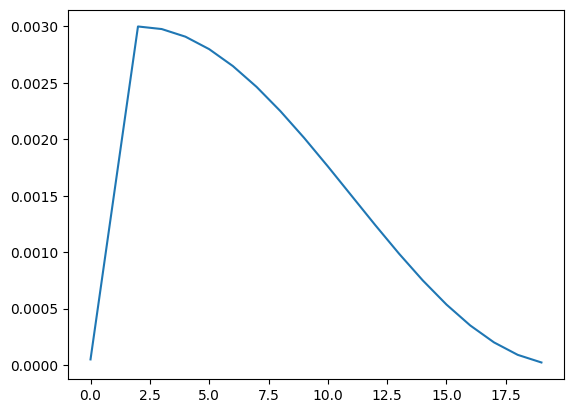

In [21]:
training_df['lr'].plot()

<Axes: >

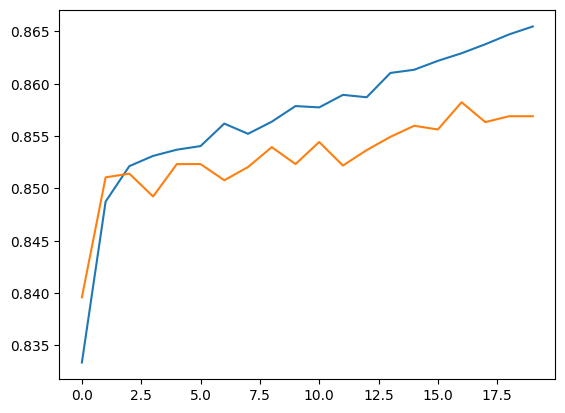

In [22]:
training_df['accuracy'].plot()
training_df['val_accuracy'].plot()

<Axes: >

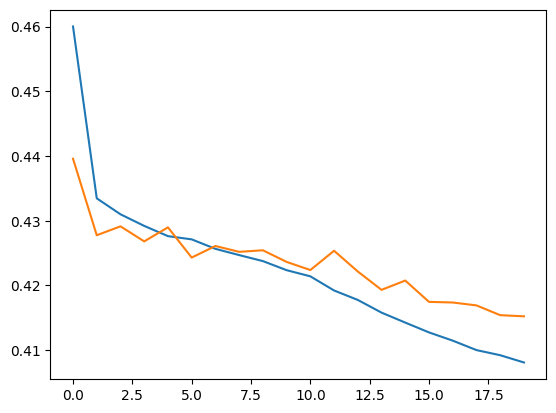

In [23]:
training_df['loss'].plot()
training_df['val_loss'].plot()

In [24]:
model.evaluate(X_val, y_val)

445/445 [==============================] - 1s 2ms/step - loss: 0.4152 - accuracy: 0.8569 - auc_1: 0.7543


[0.4152383804321289, 0.8568916916847229, 0.7543324828147888]

Our model is preforming decently